This notebook is for comparing saved models

In [7]:
import matplotlib.pyplot as plt
import h5py
import json
from keras.models import load_model

In [15]:


file_path = 'MPxBN_DO_20240730-235858.h5'

# Load the description and training history
with h5py.File(file_path, 'r') as f:
    loaded_description = f.attrs['description']
    loaded_history_json = f.attrs['training_history']
    loaded_history = json.loads(loaded_history_json)
    train_loss = loaded_history['loss']
    train_accuracy = loaded_history['accuracy']
    val_loss = loaded_history['val_loss']
    val_accuracy = loaded_history['val_accuracy']

print(f'Loaded description: {loaded_description}')
print(f'Loaded history: {loaded_history}')


# Load the saved model
saved_model = load_model(file_path)
saved_model.summary()

Loaded description: reduced the complextity of my model and added maxpooling and dropout
Loaded history: {'loss': [5.646029472351074, 3.641388177871704, 2.9792816638946533, 2.477081537246704, 2.0966341495513916, 1.8136851787567139, 1.6095356941223145, 1.4174925088882446, 1.2577060461044312, 1.148344874382019, 1.0421125888824463, 0.9710251092910767, 0.9250649213790894, 0.8764908313751221, 0.843805193901062, 0.8277361392974854, 0.7740353941917419, 0.7855620980262756, 0.7765538692474365, 0.7407012581825256], 'accuracy': [0.31869998574256897, 0.3422999978065491, 0.365200012922287, 0.4115999937057495, 0.4553000032901764, 0.492000013589859, 0.5156999826431274, 0.5716999769210815, 0.6238999962806702, 0.667900025844574, 0.7113999724388123, 0.7311000227928162, 0.7577999830245972, 0.7700999975204468, 0.7872999906539917, 0.7954999804496765, 0.8134999871253967, 0.8120999932289124, 0.8141000270843506, 0.8269000053405762], 'val_loss': [4.036587715148926, 3.2731006145477295, 2.7200212478637695, 2.311

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 360,230 (1.37 MB)

 Trainable params: 360,228 (1.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

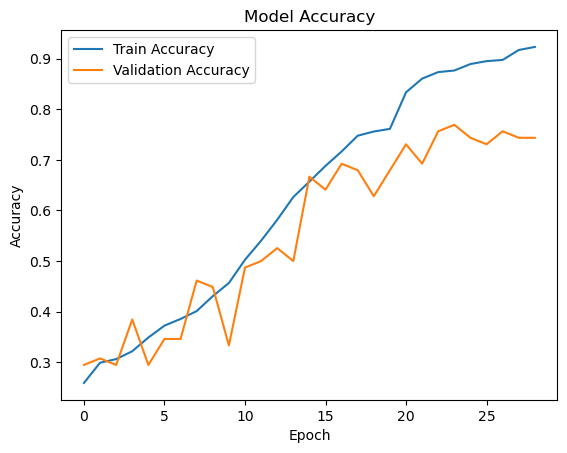

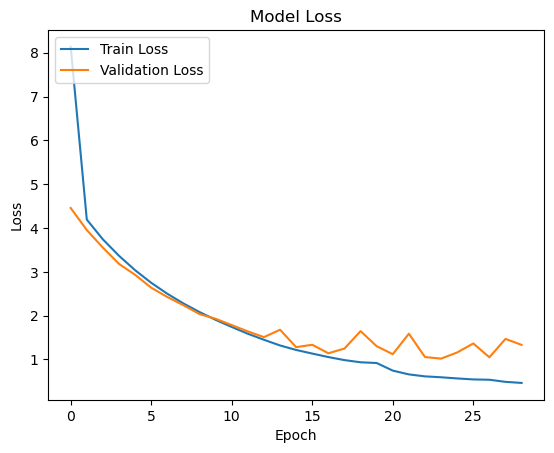

In [10]:
# Accuracy Plot
#plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Loss Plot
#plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')


plt.show()

Found 78 files belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


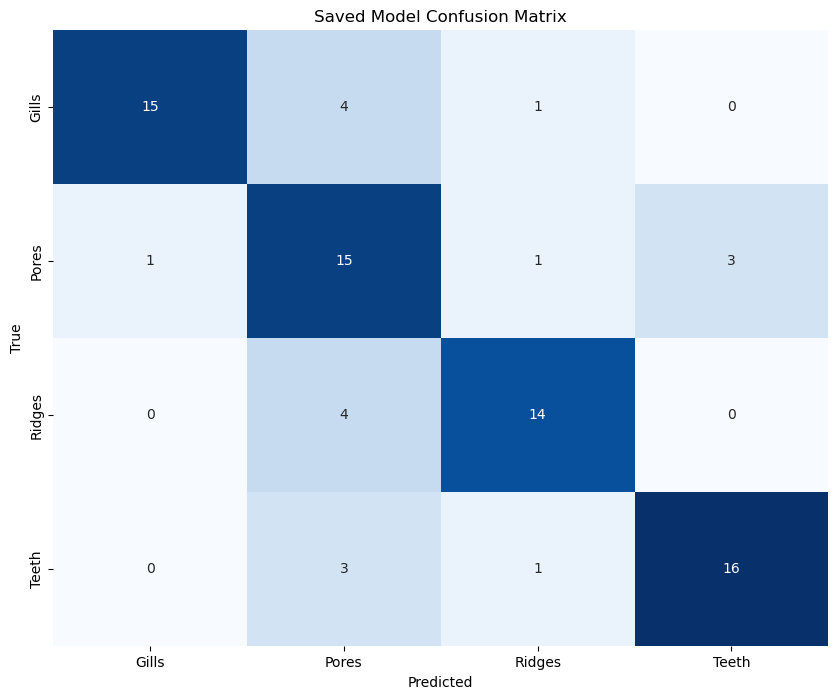

              precision    recall  f1-score   support

       Gills       0.94      0.75      0.83        20
       Pores       0.58      0.75      0.65        20
      Ridges       0.82      0.78      0.80        18
       Teeth       0.84      0.80      0.82        20

    accuracy                           0.77        78
   macro avg       0.80      0.77      0.78        78
weighted avg       0.79      0.77      0.78        78



In [11]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\kevin\OneDrive\Desktop\DispersalData\val_ds',
    labels='inferred',
    label_mode='categorical',
    image_size=(128, 128)
    
)
# Prepare for predictions
saved_model_val_labels = []
saved_model_val_preds = []

for images, labels in val_ds:
    preds = saved_model.predict(images)
    saved_model_val_labels.extend(np.argmax(labels.numpy(), axis=1))
    saved_model_val_preds.extend(np.argmax(preds, axis=1))

# Compute confusion matrix
saved_model_cm = confusion_matrix(saved_model_val_labels, saved_model_val_preds)
saved_model_class_names = val_ds.class_names

plt.figure(figsize=(10, 8))
sns.heatmap(saved_model_cm, annot=True, fmt='d', cmap='Blues', xticklabels=saved_model_class_names,
            yticklabels=saved_model_class_names, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Saved Model Confusion Matrix')
plt.show()

report = classification_report(saved_model_val_labels, saved_model_val_preds, target_names=saved_model_class_names)
print(report)

In [4]:

import graphviz
import tensorflow as tf
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(saved_model, to_file='model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
